In [1]:
library(tidyverse)  # ggplot2
library(palmerpenguins)
head(penguins)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [2]:
# Univariate plots 单变量图
univar_plot <- ggplot(data=penguins, aes(x=flipper_length_mm)) + xlab("Flipper Length (mm)")

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


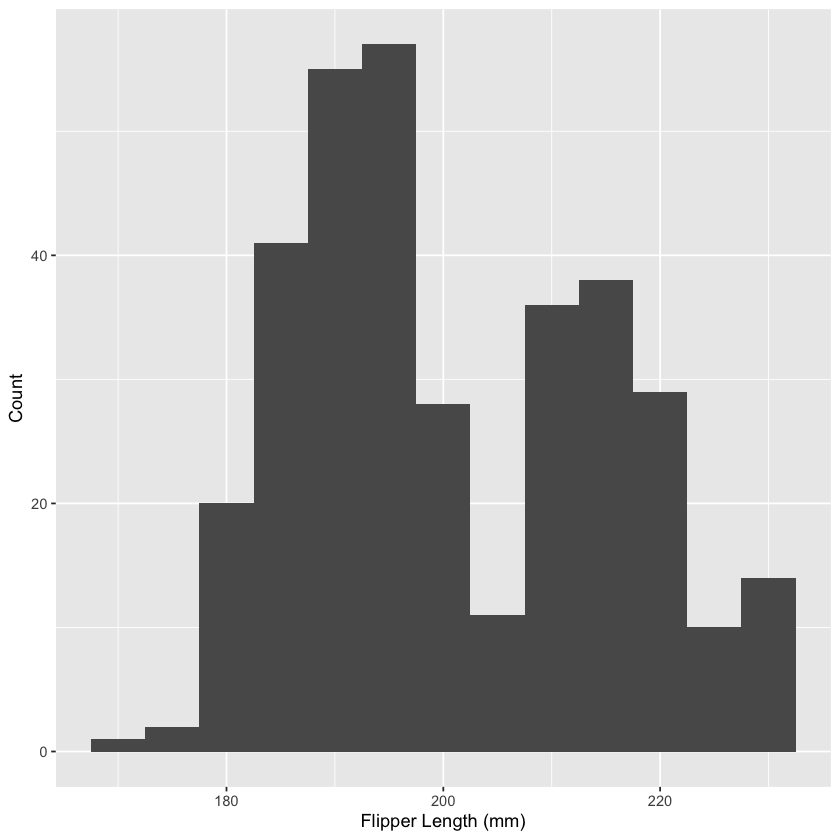

In [3]:
univar_plot+geom_histogram(binwidth = 5)+ylab("Count")  # 将每个柱子的宽度设置为 5mm 的鳍长

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


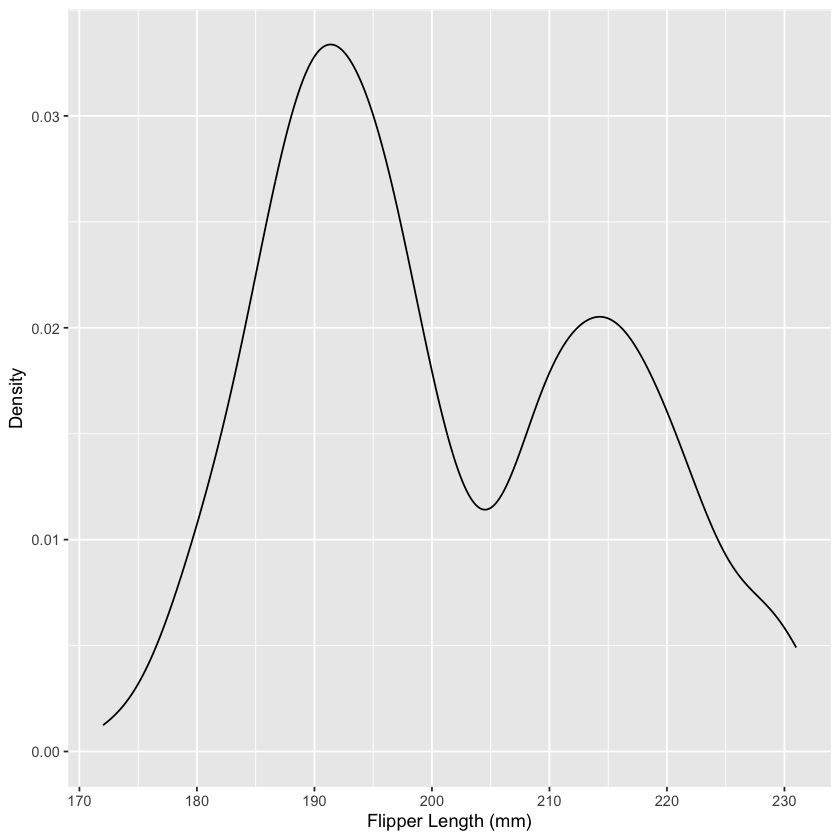

In [4]:
univar_plot+geom_density(adjust=0.8)+ylab('Density')
# 核密度估计的平滑度: adjust值越小, 曲线会越尖锐; 越大曲线越平滑, 0.5是比较尖锐的平滑度

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


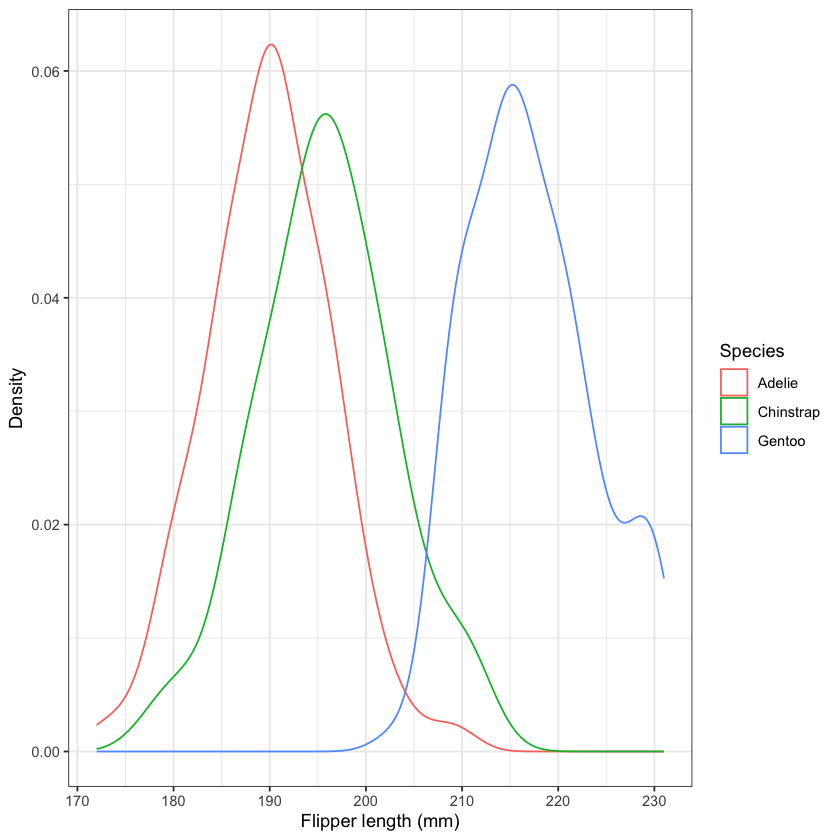

In [5]:
# 双变量图
ggplot(data=rename(penguins, Species=species), aes(x=flipper_length_mm, color=Species))+
    geom_density()+theme_bw()+xlab("Flipper length (mm)")+ylab("Density")
# 先rename一下数据列, 确定x轴上的数据, 数据颜色区分依据theme_bw(): 设置图表的主题为黑白背景（theme_bw）
# geom_density(): 绘制密度图
# theme_bw(): 设置图表的主题为黑白背景

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


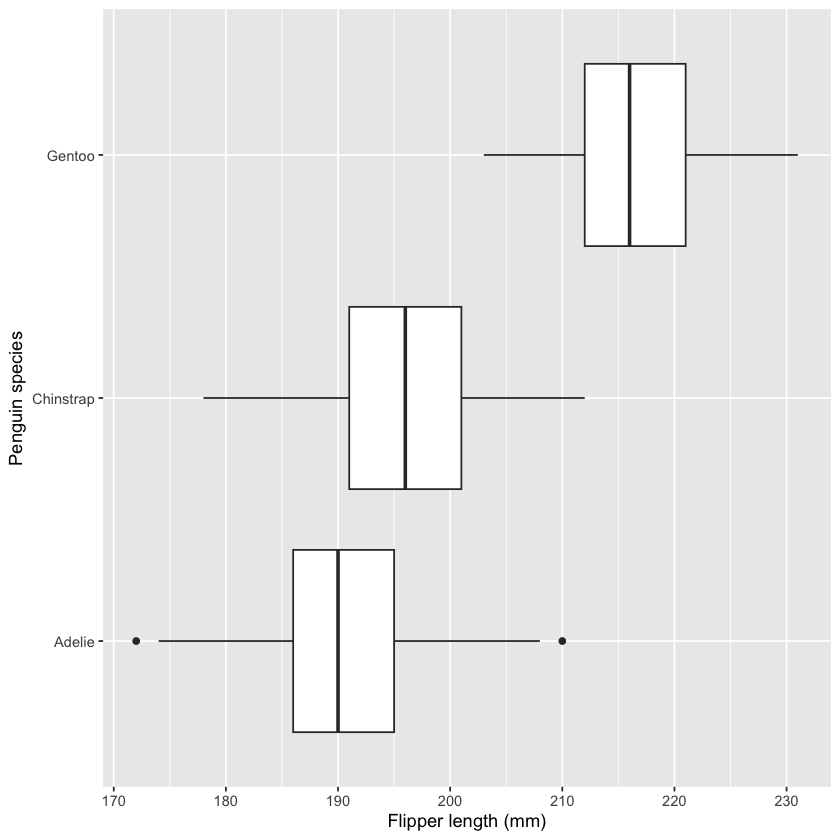

In [6]:
# 箱型图
ggplot(data=penguins, aes(x=flipper_length_mm, y=species))+geom_boxplot()+
    xlab('Flipper length (mm)') + ylab("Penguin species")

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


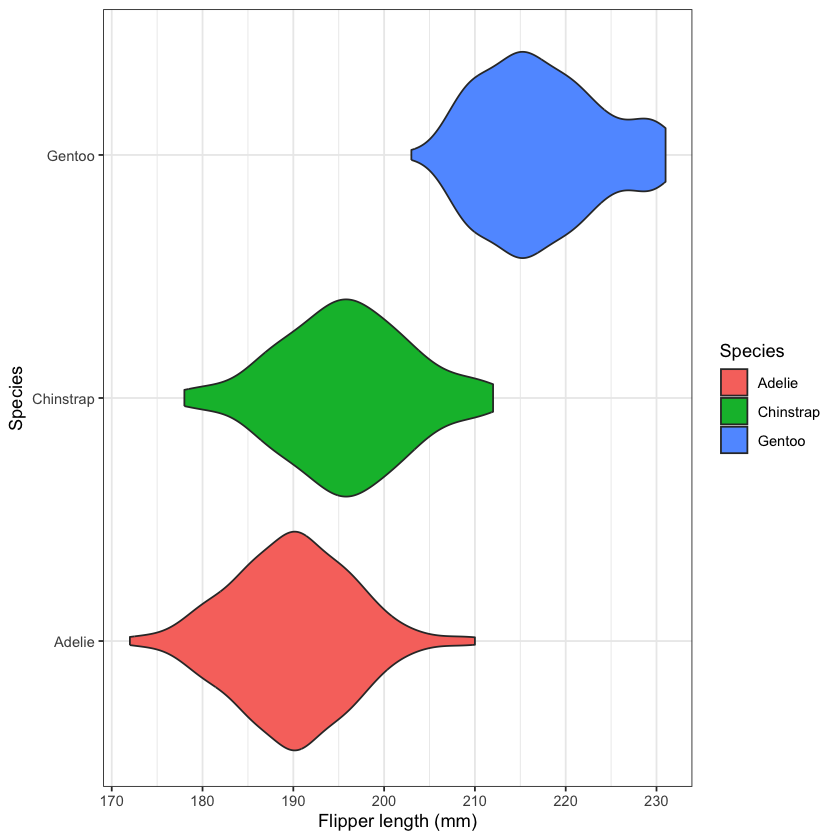

In [7]:
# 小提琴图
ggplot(data=rename(penguins, Species=species), aes(x=flipper_length_mm, y=Species, fill=Species))+geom_violin()+theme_bw()+xlab("Flipper length (mm)")
# fill = Species: 不同的物种会有不同的填充颜色, 使图形更具辨识度

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


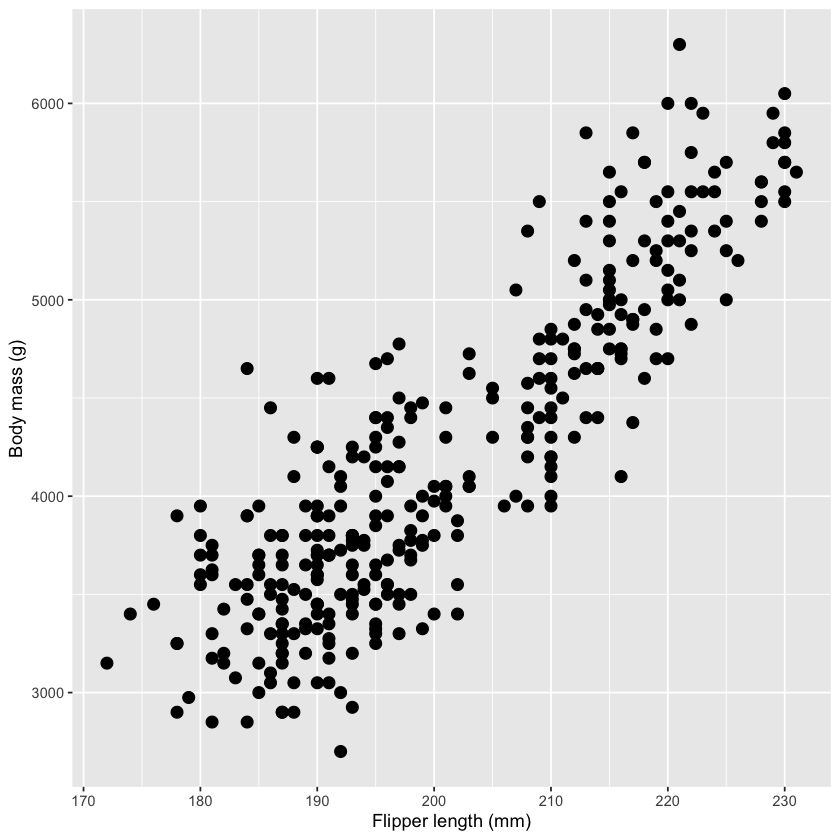

In [8]:
mass_flipper_scatter <- ggplot(data=penguins, aes(y=body_mass_g, x=flipper_length_mm))+
    xlab("Flipper length (mm)") + ylab("Body mass (g)")
mass_flipper_scatter+geom_point(size=3)  # 散点的大小

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


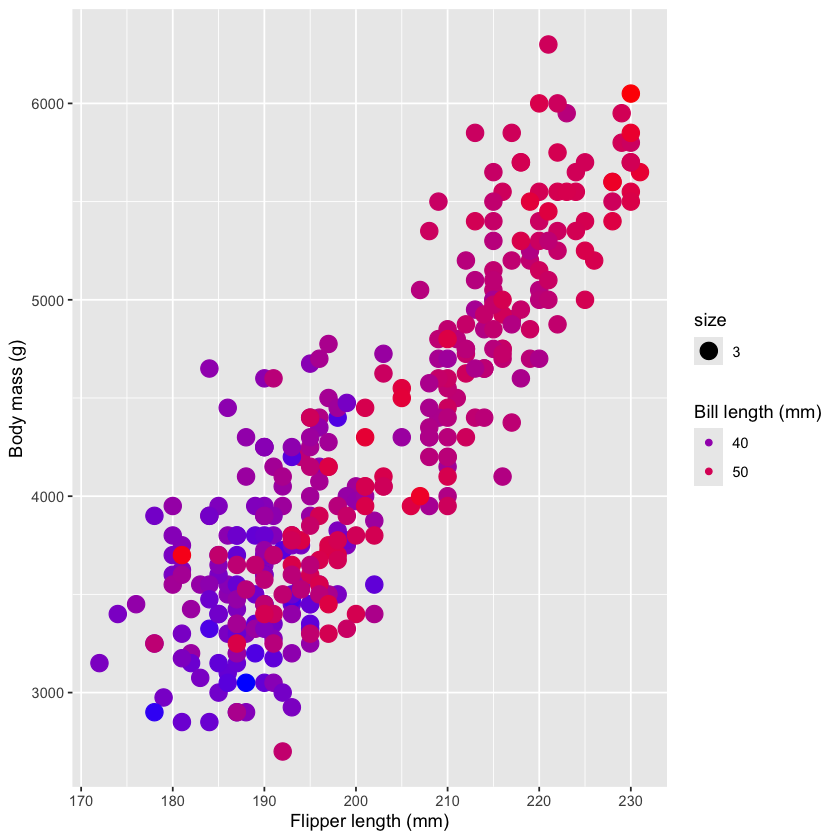

In [9]:
# Multivariate Plots
mass_flipper_scatter+geom_point(aes(color=bill_length_mm, size=3))+
    scale_color_gradient(low="blue", high="red")+guides(color=guide_legend("Bill length (mm)"))
# 为散点图增加颜色映射, 将企鹅的喙长 (bill_length_mm) 与散点的颜色绑定
# scale_color_gradient(low="blue", high="red"): 通过颜色渐变来展示喙长的数据, 较低的喙长值会用蓝色表示
# uides(color=guide_legend("Bill length (mm)")): 为颜色添加一个图例, 并将图例的标题设置为Bill Length (mm)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


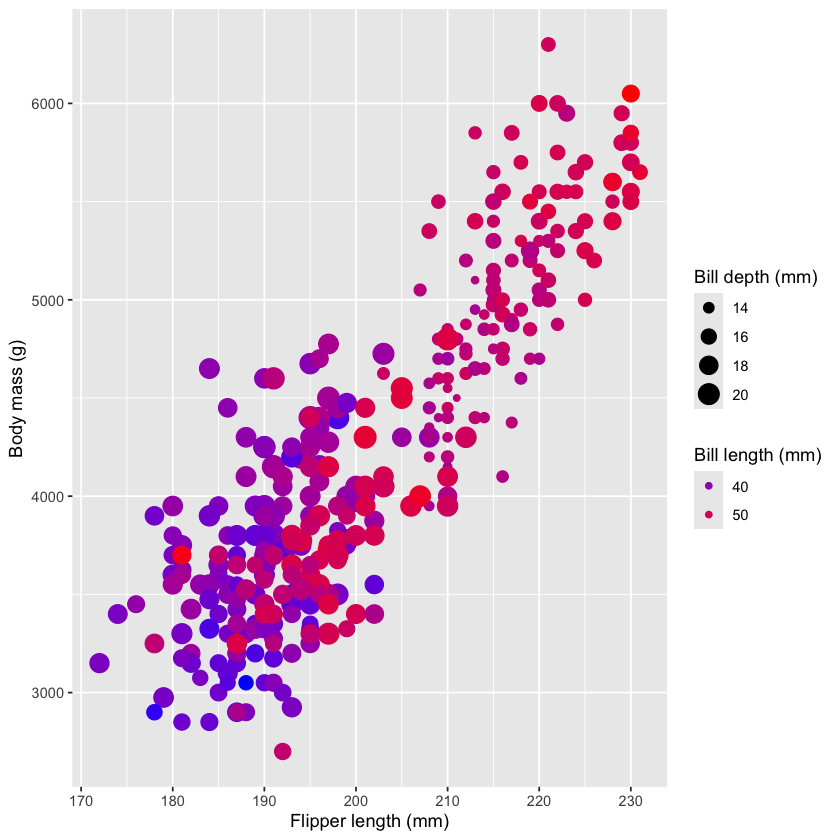

In [10]:
mass_flipper_scatter+geom_point(aes(color=bill_length_mm, size=bill_depth_mm))+
    scale_color_gradient(low="blue", high="red")+
    guides(color=guide_legend("Bill length (mm)"), size=guide_legend("Bill depth (mm)"))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


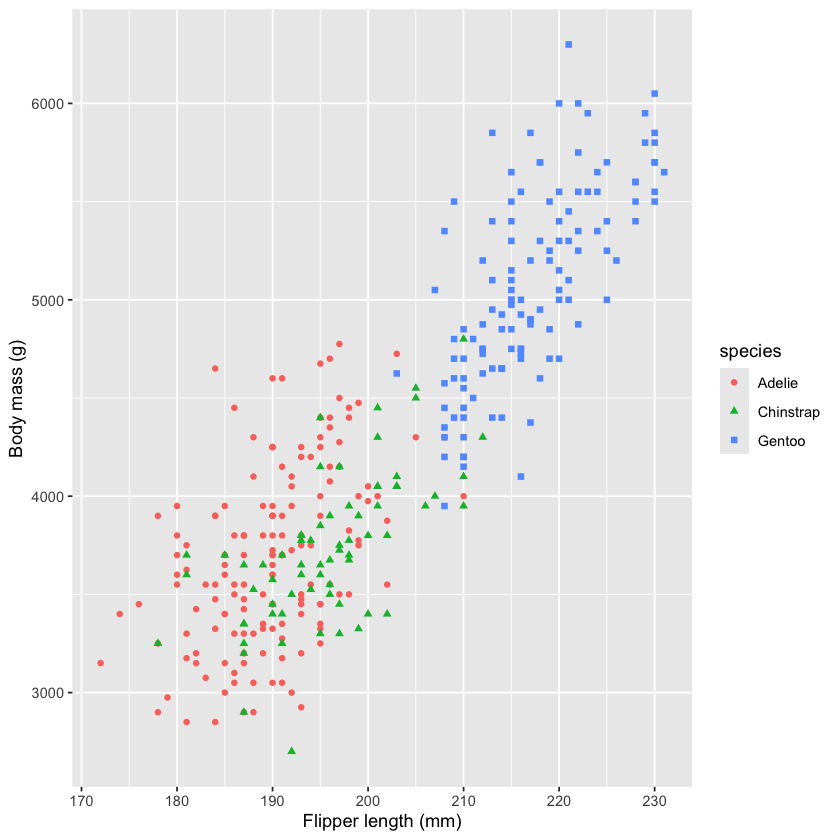

In [11]:
mass_flipper_scatter+geom_point(aes(color=species, shape=species))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_text()`).”


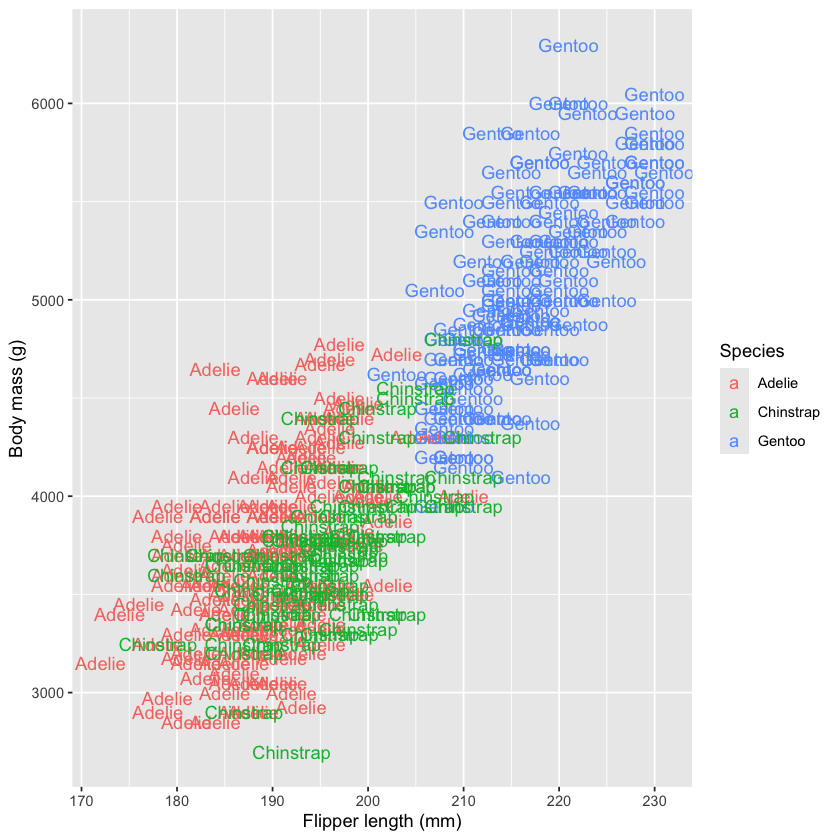

In [12]:
mass_flipper_scatter + geom_text(aes(label=species, color=species)) + 
    guides(color=guide_legend("Species"))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


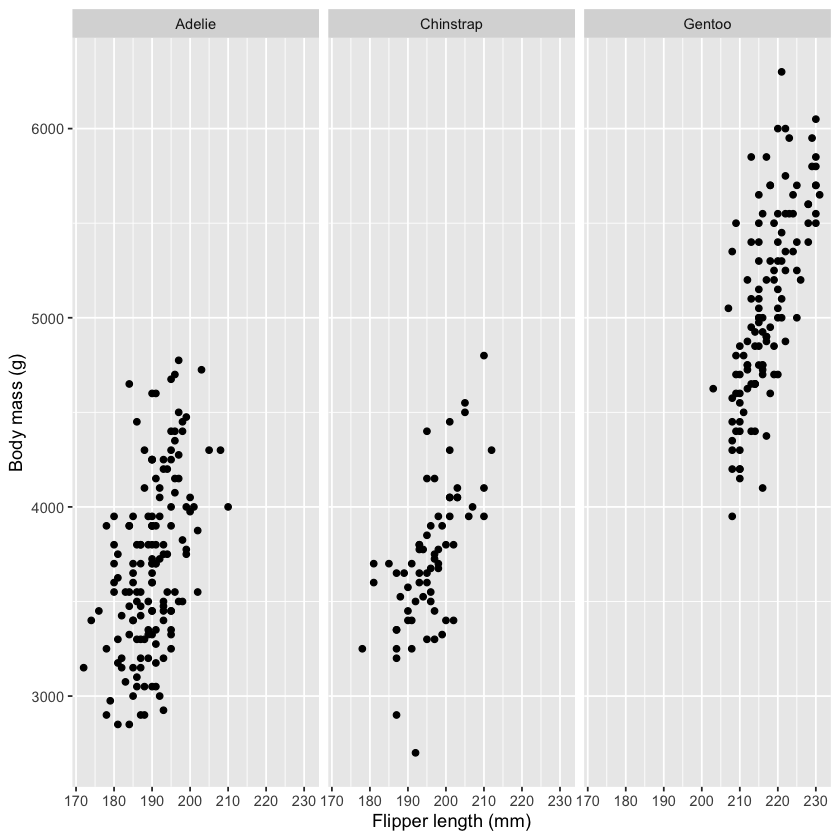

In [13]:
# Facets
mass_flipper_scatter + geom_point() + facet_wrap(~species)
# 将散点图按企鹅的物种进行分面展示
# ~species: 表示按species列的值(物种)进行分类, 每个物种的数据会展示在单独的小图中

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


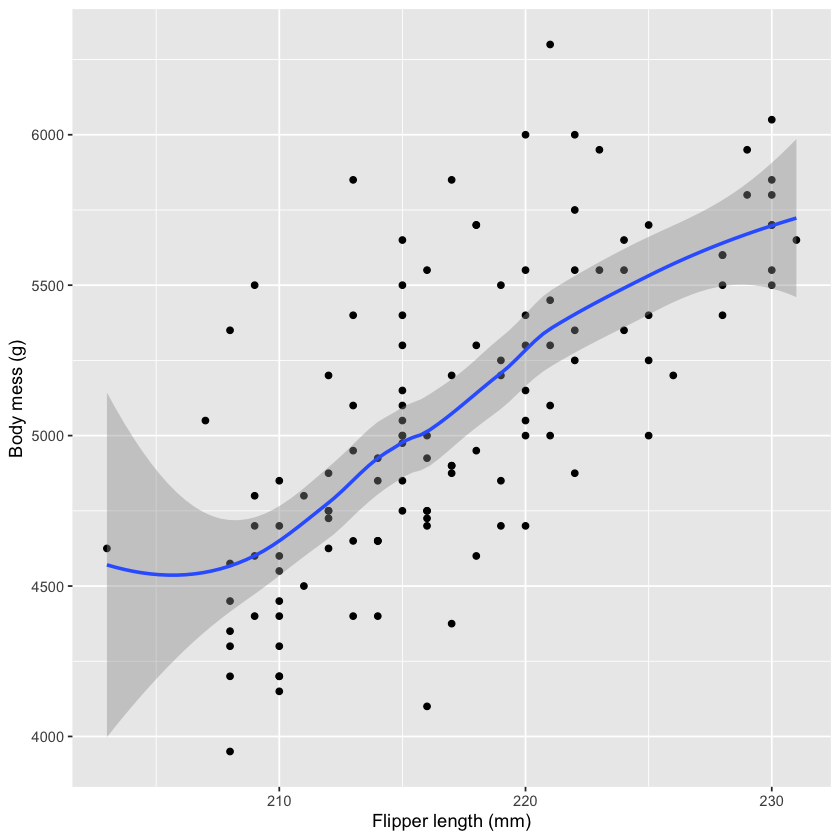

In [14]:
# Trend Lines
trend_plot <- ggplot(data=filter(penguins, species=='Gentoo'), aes(y=body_mass_g, x=flipper_length_mm))  + xlab('Flipper length (mm)') + ylab('Body mess (g)') + geom_point()
trend_plot + geom_smooth()  # 添加趋势线

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


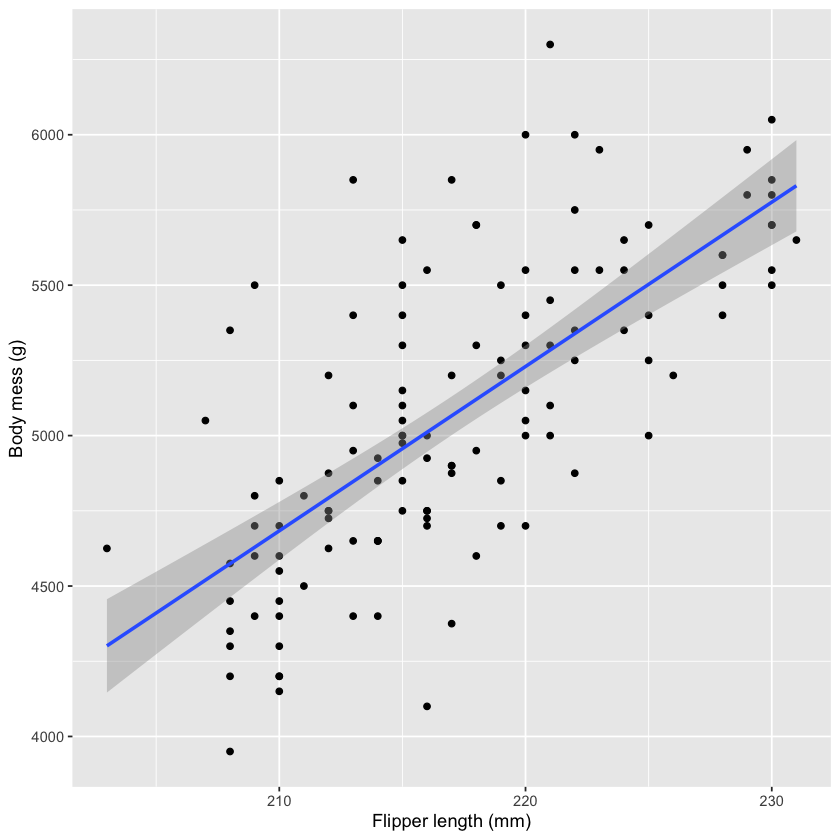

In [15]:
trend_plot+geom_smooth(method="lm")  # 可以通过 method 参数选择不同的拟合方法, 例如线性回归lm

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


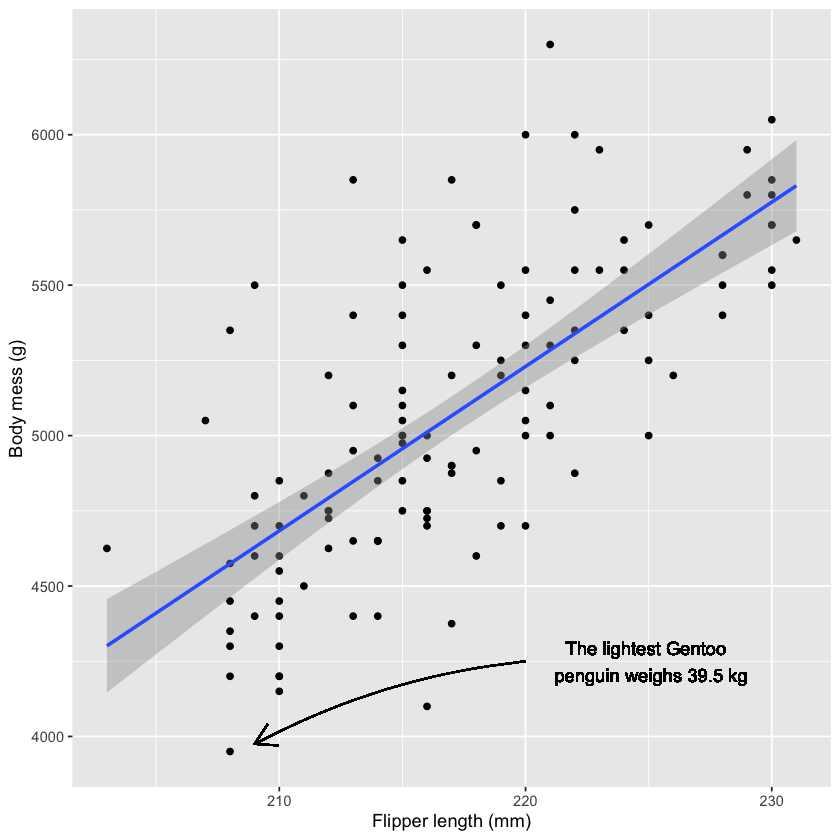

In [16]:
trend_plot + geom_smooth(method="lm") +  # 添加一条基于线性回归的趋势线
  geom_curve(x=220, xend=209, y=4250, yend=3975, arrow=arrow(length=unit(0.5, 'cm')), curvature=0.1) +  # 定义了曲线的起点和终点, 曲线终点添加箭头长度为0.5cm, 设置曲线的弯曲度0.1表示稍微弯曲
  geom_text(x=225, y=4250, label="The lightest Gentoo \n penguin weighs 39.5 kg")  # 设置文本的位置